# yeet  CUSTOMER ANALYSIS ROUND 2 ###############################

In [ ]:
#change cell from code to markdown #more hashtags = smaller font 

In [2]:
import pandas as pd
import numpy as np

In [ ]:
# Dealing with the data
# Show the dataframe shape.
# Standardize header names.
# Which columns are numerical?
# Which columns are categorical?
# Check and deal with NaN values.
# Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
# BONUS: Put all the previously mentioned data transformations into a function.

In [ ]:
# ROUND1

In [3]:
file1 = pd.read_csv('marketing_customer_analysis.csv')

In [4]:
file1.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [5]:
file1.shape

(10910, 26)

In [6]:
cols = []
for column in file1.columns:
    cols.append(column.lower())
file1.columns = cols
file1

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [7]:
file1 = file1.drop(['unnamed: 0'], axis=1)
file1.head()
# drop unnamed because its useless 

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [ ]:
# drop duplicates ????????????

In [8]:
file1.select_dtypes(np.number) #numerical 

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [9]:
file1.select_dtypes(object) #categorical 

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [10]:
file1.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [11]:
file1['response'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
# file1['response'].value_counts() #shows counts of occurances for each value 

In [ ]:
file1['response'].value_counts(dropna=False) #adds NaN to list of value counts

In [12]:
# use most common value to fillna #categoricals stick with the mode normally 
file1['response'] = file1['response'].fillna('No')

In [ ]:
file1['response'].value_counts()

In [ ]:
file1.isna().sum()

In [ ]:
file1['vehicle type'].value_counts(dropna=False)

In [13]:
file1['vehicle type'] = file1['vehicle type'].fillna('A')

In [ ]:
# vehicle type could be drop 

In [ ]:
# M maybe NaN here is M / Auto / Manual

In [ ]:
file1['vehicle type'].value_counts()

In [ ]:
file1.isna().sum()

In [ ]:
# file1['vehicle class'].value_counts(dropna=False)
# balance data by merging cats lux + sports?

In [ ]:
file1['vehicle size'].value_counts(dropna=False)

In [14]:
file1['vehicle size'] = file1['vehicle size'].fillna('Medsize')

In [ ]:
file1['vehicle size'].value_counts(dropna=False)

In [ ]:
file1.isna().sum()

In [ ]:
file1['months since last claim'].value_counts(dropna=False)

In [15]:
meanmonths = round(file1['months since last claim'].mean(),0)
meanmonths
file1['months since last claim'] = file1['months since last claim'].fillna(meanmonths)
# donors['median_home_val'] = donors['median_home_val'].fillna(mean_median_home_value) #fills null values with the mean value

In [ ]:
file1['months since last claim'].value_counts(dropna=False)

In [ ]:
file1.isna().sum()

In [ ]:
file1

In [82]:
file1['number of open complaints'].value_counts(dropna=False)

0.0    8793
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number of open complaints, dtype: int64

In [81]:
meanopen = round(file1['number of open complaints'].mean(),1)
meanopen
file1['number of open complaints'] = file1['number of open complaints'].fillna(meanopen)

0.4

In [16]:
# file1['number of open complaints'] = file1['number of open complaints'].fillna(0.0)
#dont use fill(0.0) #use same method as monthsincelastclaim to keep correlation between related columns

In [ ]:
file1['state'].value_counts(dropna=False)

In [17]:
file1['state'] = file1['state'].fillna('other') # unknown state "U" / "other" / cali vs oregon too close to merge 

In [ ]:
file1['state'].value_counts(dropna=False)

In [ ]:
# unknown state "U" / "other" / cali vs oregon too close to merge 

In [ ]:
file1['vehicle class'].value_counts(dropna=False)
# balance data by merging cats lux + sports? cant figure this out 

In [18]:
file1['vehicle class'] = file1['vehicle class'].fillna('Four-Door Car')

In [ ]:
file1['vehicle class'].value_counts(dropna=False)

In [ ]:
file1.isna().sum()

In [ ]:
file1

In [19]:
file1['effective to date']=pd.to_datetime(file1['effective to date'])
# file1['effective to date'] = pd.to_datetime(file1['effective to date']

In [ ]:
file1.dtypes

In [20]:
file1['month'] = file1['effective to date'].dt.month
file1

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [ ]:
#slicing #row indexes and column indexes #will return only those indexes
# data.loc[[0,1,2],['id','state']] #specific index
# data.loc[:,['id','state']] #all index for selected column >>>>>>>>>>>>>>

In [ ]:
# file1.loc[:,['effective to date']] 

In [ ]:
# display(file1['year'] == pd.DatetimeIndex(file1['effective to date']).year)
# display(file1['month'] == pd.DatetimeIndex(file1['effective to date']).month)


In [ ]:
# file1['effective to date'] = pd.to_datetime(file1['effective to date'], errors='coerce')
# file1.head()

In [ ]:
# file1.loc[:,['effective to date']]

In [ ]:
# display(file1['year'] == pd.DatetimeIndex(file1['effective to date']).year)
# display(file1['month'] == pd.DatetimeIndex(file1['effective to date']).month[1])
# display(file1['month'] == pd.DatetimeIndex(file1['effective to date']).month[2])
# df[df['Date'].dt.month in (1,2,3)] from Ago
# file1[file1['Date'].dt.month in (1,2,3)]


In [ ]:
# file1[file1(pd.DatetimeIndex(file1['effective to date']).month[2])] 

In [ ]:
# file1[file1['effective to date']==True,[1]]

In [ ]:
#filtering! #all the values in data where very generous is true 
# data[data['very_generous']==True]

In [ ]:
#combining filters
#filtering!
# data[(data['target_d']==100) & (data['very_generous']) ]     #& = and | = or

In [ ]:
# data['donated_big'] = data['target_d']>10 #true or false for >10
# data.head()
#  creating a new column 

In [ ]:
# Examples of working with datetime format:

# file = pd.read_csv('df_final_web_data_pt_1.csv')
# file.head()

# file['date_time'] = pd.to_datetime(file['date_time'], errors='coerce')
# file.head()



In [ ]:
# file['date_time'][0]

In [ ]:
# file['date_time'][0].day
# file['date_time'][0].month
# file['date_time'][0].year
# file['date_time'][0].isoweekday()  # Returns 1 for Monday and so on

# file['date_time'][0].time()
# file['date_time'][0].isoweekday()
# file['date_time'][0].isoformat()
# file['date_time'][0].strftime(format='%d-%m-%Y')
# file['date_time'][0].strftime(format="%A %d. %B %Y")


In [ ]:
# import time
# from datetime import date

# today = date.today()
# today.strftime(format='%d-%m-%Y')

# time.localtime(time.time())
# time.gmtime(time.time())

In [ ]:
# for colname in donors.columns:
#     cols.append(colname.lower())
# donors.columns = cols
# donors = donors.rename(columns={'controln':'id',
#                                 'hv1':'median_home_val', 
#                                 'ic1':'median_household_income'})

In [ ]:
# # strategy: impute a value for the missing value (fill in a value that we choose or calculate)
# # import numpy
# import numpy as np
# mean_median_home_value = donors['median_home_val'].mean()
# mean_median_home_value
# donors['median_home_val'] = donors['median_home_val'].fillna(mean_median_home_value) #fills null values with the mean value

In [ ]:
# #donors['gender'].unique()  # check the unique elements in the column    CHANGE NAMES TO FILE1
# # Now define a function to clean the column
# def clean(x):
#     if x in ['M', 'MALE']:
#         return 'Male'
#     elif x.startswith('F'):
#         return 'Female'
#     else:
#         return 'U'

# donors['gender'] = list(map(clean, donors['gender']))
# donors['gender'].unique()  # To check the results again

# CUSTOMER ANALYSIS ROUND 3 #####################################

## EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
## Show DataFrame info.
## Describe DataFrame.
## Show a plot of the total number of responses.
## Show a plot of the response rate by the sales channel.
## Show a plot of the response rate by the total claim amount.
## Show a plot of the response rate by income.

In [21]:
file1

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [22]:
file1.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.140422,48.091934,0.361962,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.783582,27.940675,0.890134,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
# Show a plot of the total number of responses.

In [ ]:
# sns.countplot(x=df["class"])

In [ ]:
# file1.plot() #not sure if this is the right plot for the question 

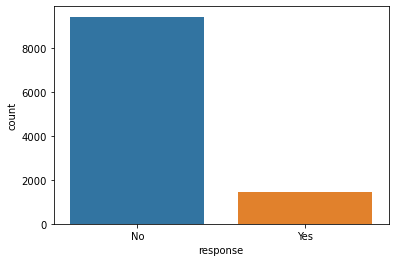

In [24]:
# df = file1
sns.countplot(x = file1['response'])
plt.show()

In [ ]:
# Show a plot of the response rate by the sales channel.

In [ ]:
# everything can be a bar chart, but that is a sad sad world
# sns.barplot(x="gender", y="target_d", data=data) #sns labels axis etc, presented a bit better 
# plt.show() #shows averages of axis y

In [ ]:
#scatterplots are great to compare two distinct variables and see if they are somehow related!
# sns.scatterplot(x=file1['response'], y=file1['sales channel'])
# plt.show()

In [ ]:
# sns.countplot(x = file1['response'], y = file1['sales channel'])
# plt.show()

In [ ]:
file1['response'].value_counts()
# file1['sales channel'].value_counts()

In [ ]:
# file1['sales channel'].value_counts()

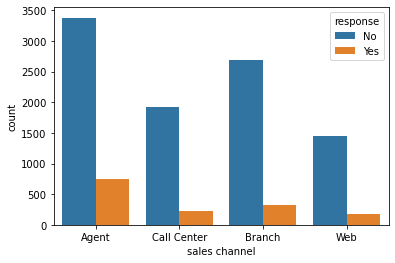

In [25]:
sns.countplot(x='sales channel', hue= 'response', data=file1)
plt.show()

In [26]:
file1['responserate'] = np.where(file1.response == 'Yes',1,0)

In [ ]:
file1.responserate.value_counts()

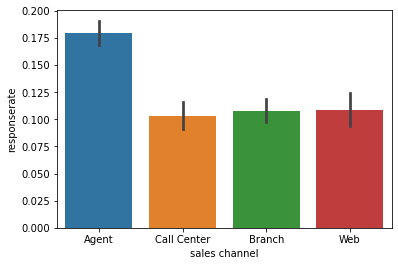

In [27]:
sns.barplot(x='sales channel',y='responserate',data=file1)
plt.show()

In [ ]:
# test = file1['response'].value_counts()
# test1 = file1['sales channel'].value_counts()

In [ ]:
# sns.barplot(x=file1['sales channel'], y=file1['response'])
# plt.show()

In [ ]:
# sns.distplot(x=file1['response'], y=file1['sales channel'])
# plt.show()

In [ ]:
# sns.countplot(y='response',data=df)

In [ ]:
# sns.boxplot(data=file1, x = file1['response'], y=file1['sales channel'])
#(y = file['sales channel']))
# plt.show()

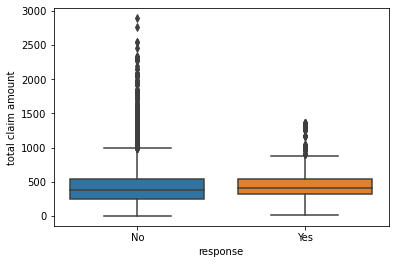

In [28]:
sns.boxplot(x=file1['response'], y=file1['total claim amount'])
plt.show()

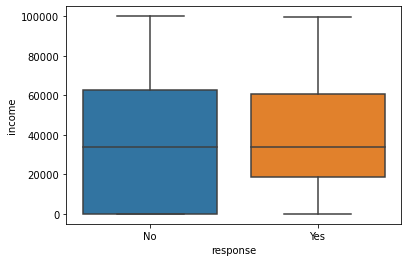

In [29]:
sns.boxplot(x=file1['response'], y=file1['income'])
plt.show()

In [ ]:
# probably better to use something else here instead of box plot but i dont know what, 

# ROUND4 

### Complete the following task
### Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
### Now we will try to check the normality of the numerical variables visually
### Use seaborn library to construct distribution plots for the numerical variables
### Use Matplotlib to construct histograms
### Do the distributions for different numerical variables look like a normal distribution
### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [ ]:
#new dataframe variable for numerical / categorical 

In [ ]:
# multicollinearity = heatmap

In [30]:
file1clean = file1
file1clean

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,responserate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,0
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,0
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2,0
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,0


In [31]:
file1numericals = file1clean.select_dtypes(np.number) #numerical 
file1numericals

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,responserate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,9025.067525,23675,117,15.0,31,0.0,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.0,40,0.0,7,1214.400000,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2,0


In [88]:
file1categoricals = file1clean.select_dtypes(object) #categorical 
file1categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


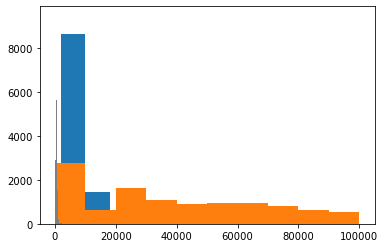

In [86]:
# # for quick visualization
# data['median_home_val'].hist(bins=100) #x axis value for median home value, y axis is count 
# plt.show()
# file1numericals.hist()
# plt.show()
# make a loop ??????????
# fig, ax = plt.subplots()
fig, ax= plt.subplots()
for column in file1numericals.columns:
    plt.hist(file1numericals[column])
    plt.show
#shows graph but dont understand exactly what the graph is 

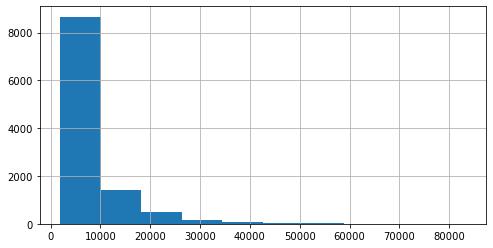

In [34]:
plt.figure(figsize=(8,4))
file1numericals['customer lifetime value'].hist()
plt.show()

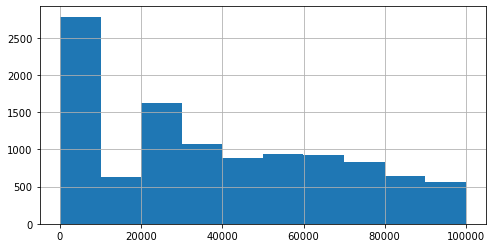

In [35]:
plt.figure(figsize=(8,4))
file1numericals['income'].hist()
plt.show()

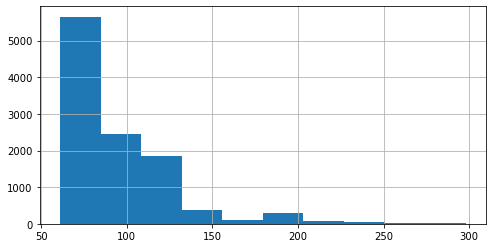

In [36]:
plt.figure(figsize=(8,4))
file1numericals['monthly premium auto'].hist()
plt.show()

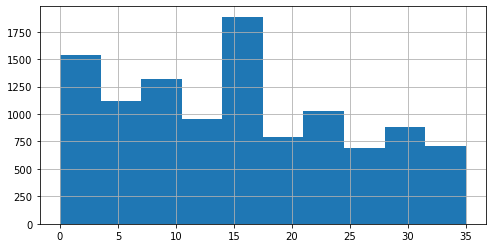

In [37]:
plt.figure(figsize=(8,4))
file1numericals['months since last claim'].hist()
plt.show()

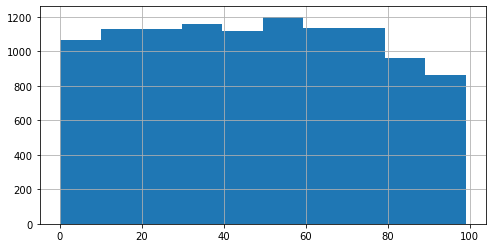

In [38]:
plt.figure(figsize=(8,4))
file1numericals['months since policy inception'].hist()
plt.show()

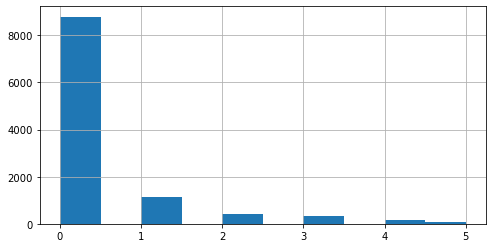

In [39]:
plt.figure(figsize=(8,4))
file1numericals['number of open complaints'].hist()
plt.show()

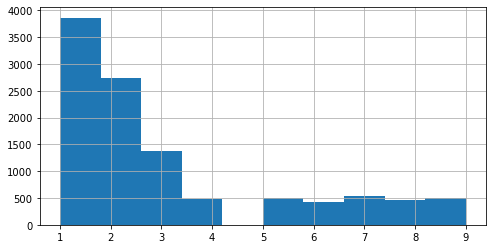

In [40]:
plt.figure(figsize=(8,4))
file1numericals['number of policies'].hist()
plt.show()

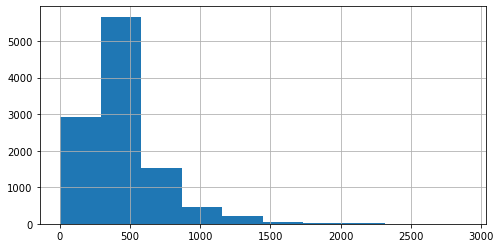

In [41]:
plt.figure(figsize=(8,4))
file1numericals['total claim amount'].hist()
plt.show()

In [ ]:
# plt.figure(figsize=(8,4))
# file1numericals['year'].hist()
# plt.show()
#not useful in any way

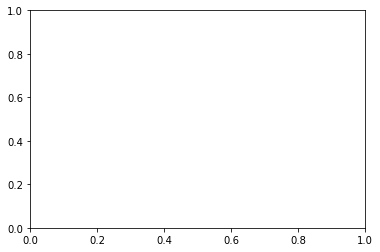

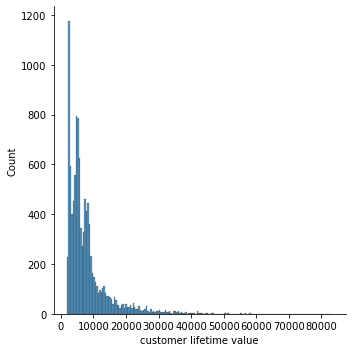

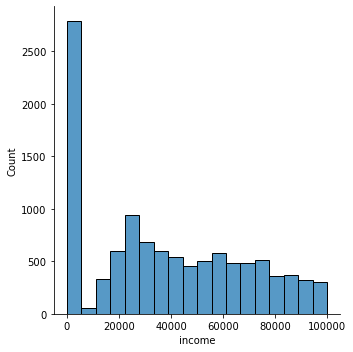

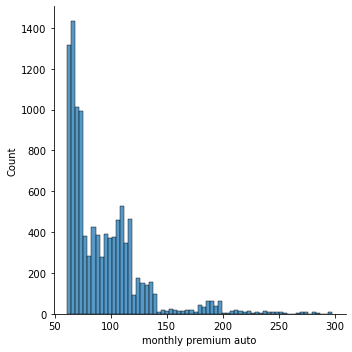

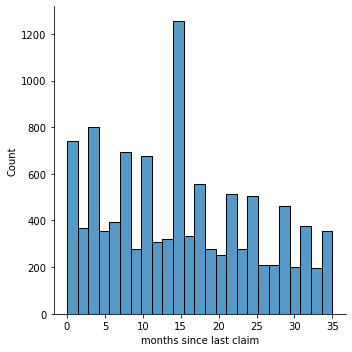

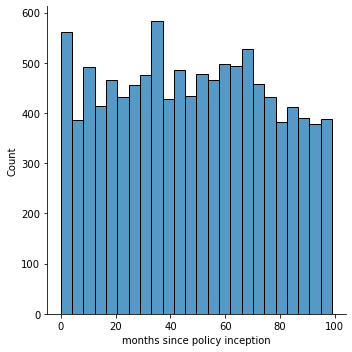

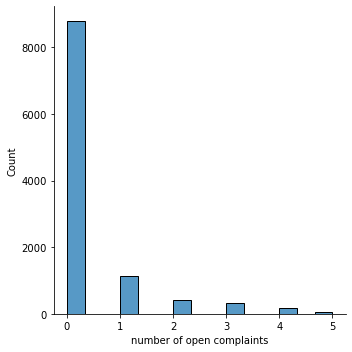

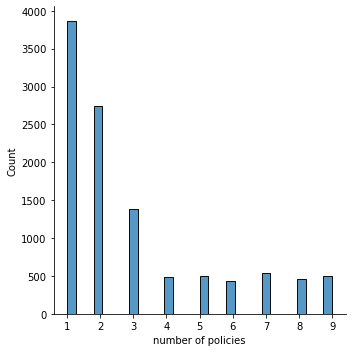

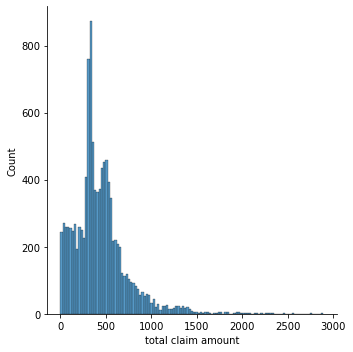

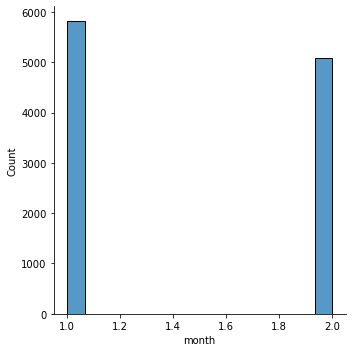

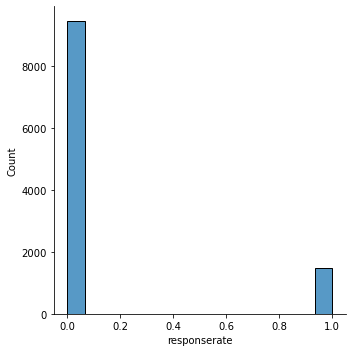

In [85]:
# make a loop for distributions?????????? 
#  for i in range(len(file1numericals.columns)):
    #file1numericals.iloc[:,i].displot()
    #plt.show
#dont know ??????????????
fig, ax= plt.subplots()
for column in file1numericals.columns:
    sns.displot(file1numericals[column])
    plt.show

In [63]:
file1numericals

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,responserate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,9025.067525,23675,117,15.0,31,0.0,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.0,40,0.0,7,1214.400000,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2,0


In [60]:
# data = data.drop(['tcode','percent_income_donated','very_generous'], axis=1)
# file1.drop(['year'],axis=1) done
# file1 = file1.drop(['total claim amount'],axis=1) DONT DO
# file1 = file1.drop(['month'],axis=1)
# file1 = file1.drop(['responserate'],axis=1)
#but i have now lost all this data as i did not make a copy, will cause issues when setting y = total claim amount i think
file1drop = file1numericals.drop(['month', 'responserate'], axis=1)
file1drop


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,15.0,31,0.0,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.0,40,0.0,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


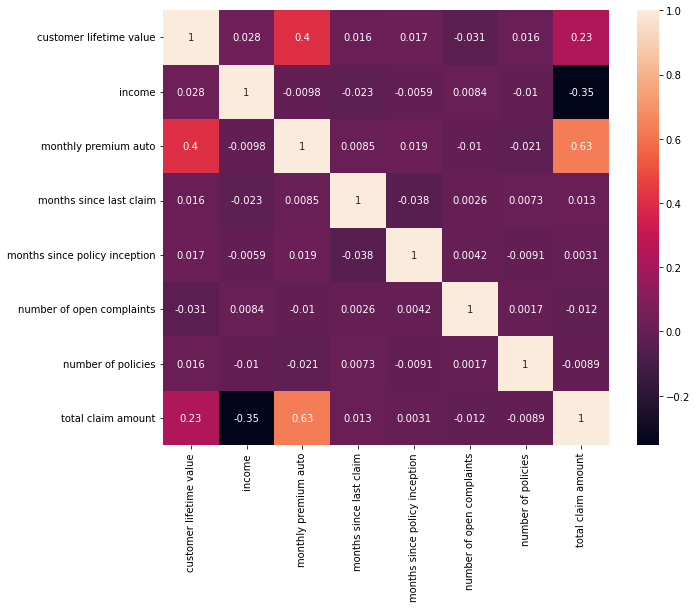

In [80]:
fig, ax=plt.subplots(figsize=(10,8))
correlations_matrix = file1drop.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [62]:
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.028306,0.403069,0.015708,0.016960,-0.030616,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.023073,-0.005903,0.008425,-0.009960,-0.354141
monthly premium auto,0.403069,-0.009788,1.000000,0.008502,0.018953,-0.010059,-0.020505,0.631799
months since last claim,0.015708,-0.023073,0.008502,1.000000,-0.038156,0.002594,0.007345,0.012678
months since policy inception,0.016960,-0.005903,0.018953,-0.038156,1.000000,0.004165,-0.009123,0.003095
number of open complaints,-0.030616,0.008425,-0.010059,0.002594,0.004165,1.000000,0.001681,-0.012380
number of policies,0.016024,-0.009960,-0.020505,0.007345,-0.009123,0.001681,1.000000,-0.008923
total claim amount,0.232626,-0.354141,0.631799,0.012678,0.003095,-0.012380,-0.008923,1.000000


# ROUND5 

## Get the data
## We are using the marketing_customer_analysis.csv file.

## Dealing with the data
## Already done in the round 2.

## Explore the data
## Done in the round 3.

## Processing Data
## (Further processing...)

## X-y split. whole datatframe , x dropping target y just target X = features y = target #data.drop total claim amount #y = total claim amount only #split X into X numerical and X categorical 
## Normalize (numerical only). #minmaxscaler/standardscaler #total claim amount is target # X everything but total claim amount 

In [67]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler #alternative to minmaxscaler
#dont scale target 
# y = data['TARGET_D']
# X = data.drop(['TARGET_D'], axis=1) #exclude target 
# X_num = X.select_dtypes(include = np.number) #only sclae numerical 
# X_cat = X.select_dtypes(include = object)

In [64]:
y = file1drop['total claim amount']
X = file1drop.drop(['total claim amount'], axis=1) #exclude target 
X_num = X.select_dtypes(include = np.number) #only sclae numerical 
X_cat = X.select_dtypes(include = object)

In [65]:
X_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,9025.067525,23675,117,15.0,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.0,40,0.0,7
10906,5259.444853,61146,65,7.0,68,0.0,6
10907,23893.304100,39837,201,11.0,63,0.0,2
10908,11971.977650,64195,158,0.0,27,4.0,6


In [68]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape) #was dataframe but turned into array
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns) #back into dataframe

(10910, 7)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.087527,0.236795,0.236287,0.428571,0.313131,0.0,0.750
...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.428571,0.404040,0.0,0.750
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625


In [69]:
pd.DataFrame(x_normalized, columns=X_num.columns).corr() #correlations have not changed i think 

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
customer lifetime value,1.000000,0.028306,0.403069,0.015708,0.016960,-0.030616,0.016024
income,0.028306,1.000000,-0.009788,-0.023073,-0.005903,0.008425,-0.009960
monthly premium auto,0.403069,-0.009788,1.000000,0.008502,0.018953,-0.010059,-0.020505
months since last claim,0.015708,-0.023073,0.008502,1.000000,-0.038156,0.002594,0.007345
months since policy inception,0.016960,-0.005903,0.018953,-0.038156,1.000000,0.004165,-0.009123
number of open complaints,-0.030616,0.008425,-0.010059,0.002594,0.004165,1.000000,0.001681
number of policies,0.016024,-0.009960,-0.020505,0.007345,-0.009123,0.001681,1.000000


In [70]:
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.028306,0.403069,0.015708,0.016960,-0.030616,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.023073,-0.005903,0.008425,-0.009960,-0.354141
monthly premium auto,0.403069,-0.009788,1.000000,0.008502,0.018953,-0.010059,-0.020505,0.631799
months since last claim,0.015708,-0.023073,0.008502,1.000000,-0.038156,0.002594,0.007345,0.012678
months since policy inception,0.016960,-0.005903,0.018953,-0.038156,1.000000,0.004165,-0.009123,0.003095
number of open complaints,-0.030616,0.008425,-0.010059,0.002594,0.004165,1.000000,0.001681,-0.012380
number of policies,0.016024,-0.009960,-0.020505,0.007345,-0.009123,0.001681,1.000000,-0.008923
total claim amount,0.232626,-0.354141,0.631799,0.012678,0.003095,-0.012380,-0.008923,1.000000


# ROUND6

In [ ]:
###### Processing Data
###### (Further processing...)
###### -X-y split. (done)
###### -Normalize (numerical). (done)
###### -One Hot/Label Encoding (categorical).
###### -Concat DataFrames
###### Linear Regression:
###### -Train-test split.
###### -Apply linear regression.
###### Model Validation:
###### Description:
###### R2. MSE. RMSE. MAE.

In [ ]:
# onehotencode whole catgorical column in one 

In [90]:
file1categoricals = file1clean.select_dtypes(object) #categorical 
file1categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [108]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
# from sklearn.preprocessing import OneHotEncoder
# # encoder = OneHotEncoder().fit(X_cat) #first column will always be the most common 
# encoder2 = OneHotEncoder(drop='first').fit(X_cat2) #can drop first column, will still have 3 cats, but it hides first 
# print(encoder.categories_)
# encoded2 = encoder2.transform(X_cat2).toarray() #make into an array otherwise is a diff data type we cant do much with 
# print(encoded2)
# # onehot_encoded = pd.DataFrame(encoded,columns=['Female', 'Male','U']) #
# onehot_encoded2 = pd.DataFrame(encoded2,columns=['Male', 'U'])
# onehot_encoded2.head(20)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
cols=encoder.get_feature_names(input_features=X_cat.columns)
encoded = encoder.transform(X_cat).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=cols)

/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [99]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(drop='first').fit(X_cat)
# print(encoder.categories_)
# encoded = encoder.transform(X_cat).toarray()
# onehot_encoded = pd.DataFrame(encoded,columns=[''])
# onehot_encoded.head(20)

In [109]:
# let's merge all this information together into a single dataset with all features, now numerical
X_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
X_normalized

#  test how well our model is doing on the data #random sample of data 

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125
4,0.087527,0.236795,0.236287,0.428571,0.313131,0.0,0.750
...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.428571,0.404040,0.0,0.750
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625


In [116]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)  # np.concatenate()
X.reset_index(drop=True)

In [113]:
y = file1drop['total claim amount'] #the target 

In [114]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# y is the issue 

(8728, 7)
(2182, 7)
(8728,)
(2182,)


In [119]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
lm = linear_model.LinearRegression()

In [121]:
lm.fit(X,y) #calculates the values for b0 and b1
print('b0 = ', lm.intercept_) #b0
print('b1 = ', lm.coef_) 

b0 =  69.76609694507965
b1 =  [-5.48154348e-04 -3.34554897e-03  5.37656818e+00 -2.79347901e-02
 -1.12565371e-01 -1.12427145e+00  8.90697990e-02]


In [123]:
%%time
#let's bring in more variables
y = file1drop['total claim amount']
X = file1drop(['total claim amount'], axis=1) #everything except the target #reg_data remains same just dropping target d
lm = linear_model.LinearRegression()
lm.fit(X,y)
print(lm.score(X,y))
y_pred = lm.predict(X)
print(mean_squared_error(y_pred,y))
#results are better, but now we cannot visualize them 
# 7 dimensional result, cant draw this, rely on R2 or MSE to judge if good model or not 

TypeError: 'DataFrame' object is not callable

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [129]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions) 
# this is not what we are after

0.5235274078006495

In [131]:
mae = mean_absolute_error(y_test, predictions)
print(mae)

ValueError: Found input variables with inconsistent numbers of samples: [2182, 8728]

In [132]:
rmse = math.sqrt(mse)
print(rmse) #harsher on large erorrs as at some point they get squared 

NameError: name 'math' is not defined

In [133]:
r2 = r2_score(y_test, predictions)
r2

ValueError: Found input variables with inconsistent numbers of samples: [2182, 8728]

In [134]:
mse=mean_squared_error(y_test,predictions)
mse

ValueError: Found input variables with inconsistent numbers of samples: [2182, 8728]

# ROUND7

In [ ]:
# nothing works so cant improve

# FINAL ROUND

In [ ]:
# when(if) finished(hopeful) add comments explaining rationale to yourself and TAs